<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/11_Natutral_Language_Preprocessing_Restuarant_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [1]:
 import pandas as pd
 import nltk
 import re
 nltk.download('stopwords')
 from nltk.corpus import stopwords
 from nltk.stem.porter import PorterStemmer
 from sklearn.feature_extraction.text import CountVectorizer
 from sklearn.model_selection import train_test_split
 from sklearn.naive_bayes import GaussianNB
 from sklearn.metrics import confusion_matrix
 from sklearn.metrics import plot_confusion_matrix
 import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1 . Load data

In [2]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

fatal: destination path 'DS102.K21' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('DS102.K21/Restaurant_Reviews.tsv',delimiter = '\t', quoting = 3)

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# 2 . Preprocessing data

In [0]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [0]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [8]:
X.shape[1]

1500

In [9]:
corpus[3]

'stop late may bank holiday rick steve recommend love'

# 3 . Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# 4 . Train model

In [0]:
model = GaussianNB()

In [12]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# 5 . Evaluate model

Train data

[[340  63]
 [  0 397]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

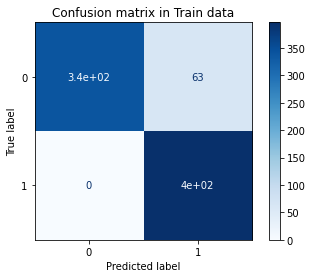

In [13]:
cm = confusion_matrix(y_train, model.predict(X_train))
print(cm)
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues')
plt.title('Confusion matrix in Train data')

In [14]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92       403
           1       0.86      1.00      0.93       397

    accuracy                           0.92       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.92      0.92       800



Test data

[[55 42]
 [12 91]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

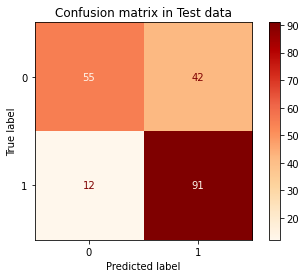

In [15]:
cm = confusion_matrix(y_test, model.predict(X_test))
print(cm)
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd')
plt.title('Confusion matrix in Test data')

In [16]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200

